<a href="https://colab.research.google.com/github/Akul1306/AIML/blob/main/exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

   feature1  feature2  feature3     target
0 -0.570563  1.420342  0.495580  -9.763182
1 -0.990563  0.556965  1.045064 -24.029355
2 -0.674728  0.150617  1.774645  45.616421
3  0.388250 -0.387127 -0.110229  34.135737
4  1.167882 -0.024104  0.145063  86.663647
Training MSE: 361.8884907170863
Test MSE: 416.20304677316074
Training R2 Score: 0.961711649711479
Test R2 Score: 0.9513306664471104


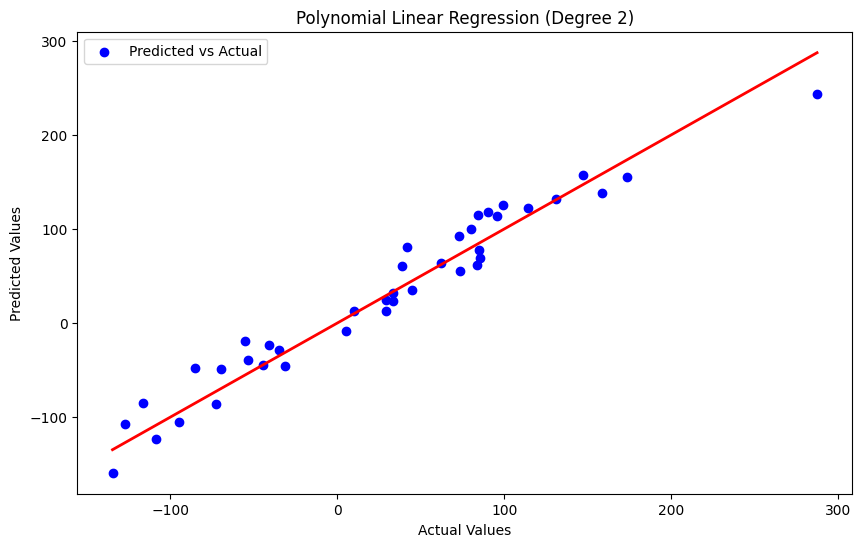

In [5]:
# Load the dataset
df = pd.read_csv('data (2).csv')

# Inspect the dataset
print(df.head())

# Define your features (X) and target variable (y)
# Modify 'target_column' to match your dataset's target column name
target_column = 'target'  # Replace with the actual target column name from the dataset
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for polynomial features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features (e.g., degree 2 for quadratic)
degree = 2  # You can change the degree to test higher-order polynomial models
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

# Plot the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Polynomial Linear Regression (Degree {degree})")
plt.legend()
plt.show()